# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [1]:
!pip install numpy pandas scikit-learn gensim matplotlib seaborn

!pip install --upgrade numpy
!pip uninstall -y numpy pandas scikit-learn
!pip install numpy pandas scikit-learn
!pip install pandas==2.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1

In [2]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling num

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [2]:
# Load dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
random.seed(42)
selected_indices = random.sample(range(len(newsgroups.data)), 2000)
documents = [newsgroups.data[i] for i in selected_indices]

In [3]:
# Preprocessing
vectorizer_tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer_tfidf.fit_transform(documents)

vectorizer_count = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = vectorizer_count.fit_transform(documents)


In [4]:
# Apply LDA and LSA
k = 10
lda_model = LatentDirichletAllocation(n_components=k, random_state=42)
lda_topics = lda_model.fit_transform(count_matrix)

lsa_model = TruncatedSVD(n_components=k, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_matrix)



In [5]:
# Compute Coherence Scores for different K values
def compute_coherence_values(texts, dictionary, k_values):
    coherence_scores = {}
    for k in k_values:
        lda_model = gensim.models.LdaModel(corpus=[dictionary.doc2bow(text) for text in texts],
                                           id2word=dictionary, num_topics=k, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores[k] = coherence_model.get_coherence()
    return coherence_scores


In [7]:
# Tokenization for coherence calculation
tokenized_texts = [[word for word in doc.lower().split() if word.isalpha()] for doc in documents]
dictionary = Dictionary(tokenized_texts)
k_values = range(5, 16)  # Checking coherence for K from 5 to 15

coherence_scores = compute_coherence_values(tokenized_texts, dictionary, k_values)

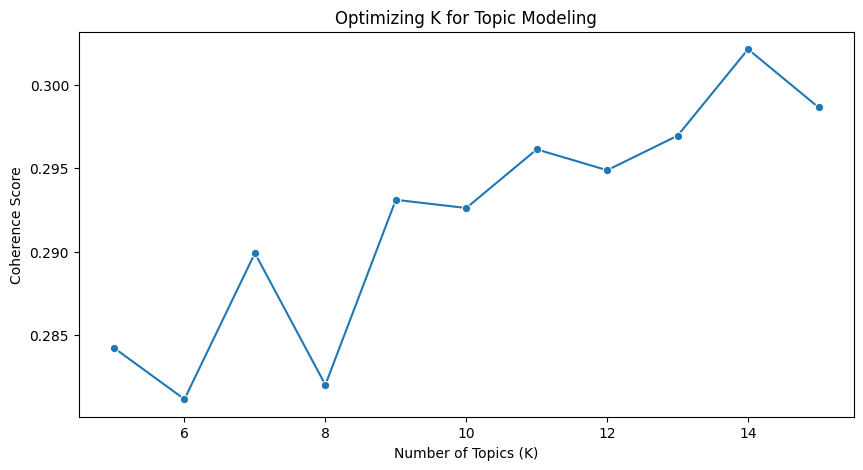

Optimal number of topics: 14


In [8]:
# Determine optimized K
optimal_k = max(coherence_scores, key=coherence_scores.get)

# Plot Coherence Scores
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(coherence_scores.keys()), y=list(coherence_scores.values()), marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimizing K for Topic Modeling")
plt.show()

print(f"Optimal number of topics: {optimal_k}")

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [23]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/reviews_doc_1000.csv"
df = pd.read_csv(file_path)

# Display basic info and preview
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  990 non-null    int64 
 1   clean_text   990 non-null    object
 2   sentiment    990 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


(None,
    document_id                                         clean_text sentiment
 0            1  I enjoyed the first two seasons of Designated ...  positive
 1            2  Season One and Two were fantastic  Interesting...   neutral
 2            3  I really liked  Designated Survivor  for the f...   neutral
 3            4  I ve liked this show even though it s a little...  positive
 4            5  This show is one of my favourite Netflix Origi...   neutral)

In [24]:
!pip install bertopic[visualization] sentence-transformers hdbscan umap-learn gensim

In [25]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pandas as pd


In [27]:
# Load your dataset
df = pd.read_csv("reviews_doc_1000.csv")
documents = df["clean_text"].dropna().tolist()

# Embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(documents, show_progress_bar=True)

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [28]:
# Step 1: Train BERTopic with K=10
topic_model_k10 = BERTopic(nr_topics=10, embedding_model=embedding_model)
topics_k10, probs_k10 = topic_model_k10.fit_transform(documents, embeddings)

In [29]:
# Step 2: Find optimal K using coherence
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

def get_topic_words(model):
    topic_words = []
    topics_dict = model.get_topics()
    for topic_num in topics_dict:
        if topic_num == -1:
            continue
        words = [word for word, _ in topics_dict[topic_num] if word.strip()]
        if words:
            topic_words.append(words)
    return topic_words

In [30]:
# Tokenize documents
tokenized_docs = [doc.lower().split() for doc in documents]
dictionary = Dictionary(tokenized_docs)

coherence_scores = []
for k in range(5, 21, 5):  # Try K = 5, 10, 15, 20
    model = BERTopic(nr_topics=k, embedding_model=embedding_model)
    topics, _ = model.fit_transform(documents, embeddings)
    topic_words = get_topic_words(model)

    cm = CoherenceModel(topics=topic_words, texts=tokenized_docs,
                        dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((k, coherence))
    print(f"Coherence for K={k}: {round(coherence, 4)}")

Coherence for K=5: 0.4612
Coherence for K=10: 0.3687
Coherence for K=15: 0.5775
Coherence for K=20: 0.6551


In [31]:
topic_model_k10.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,18,-1_the_interesting_just_her,"[the, interesting, just, her, and, wish, incre...",[The first episode was of a high quality but ...
1,0,382,0_the_season_it_that,"[the, season, it, that, of, and, but, is, to, ...",[Season 1 and 2 Designated Surivor introduced...
2,1,145,1_the_is_of_he,"[the, is, of, he, to, as, and, who, in, presid...",[Designated Survivor is the only new show of t...
3,2,90,2_it_show_netflix_add,"[it, show, netflix, add, without, doesn, the, ...",[I ve liked this show even though it s a littl...
4,3,81,3_to_the_of_his,"[to, the, of, his, this, and, state, incredibl...",[If you can get past an enemy being able to bl...
5,4,80,4_the_show_with_between,"[the, show, with, between, of, is, government,...",[I ve just binge watched it up to the end of E...
6,5,80,5_and_best_sutherland_more,"[and, best, sutherland, more, episodes, charac...",[8 episodes in and I m really enjoying this I...
7,6,40,6_actual_keeps_tom_wish,"[actual, keeps, tom, wish, our, going, kirkman...",[I wish Tom Kirkman were our actual president ...
8,7,40,7_to_its_what_is,"[to, its, what, is, an, it, have, his, so, be]",[It really is an older Jack Bauer as the Presi...
9,8,34,8_they_political_an_have,"[they, political, an, have, instead, decided, ...",[This could have been an excellent series if t...


In [32]:
topic_model_auto = BERTopic(embedding_model=embedding_model, verbose=True)
topics_auto, probs_auto = topic_model_auto.fit_transform(documents, embeddings)

topic_model_auto.get_topic_info()


2025-04-08 03:56:43,737 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:56:49,084 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:56:49,087 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:56:49,152 - BERTopic - Cluster - Completed ✓
2025-04-08 03:56:49,159 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 03:56:49,357 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,25,-1_word_netflix_especially_an,"[word, netflix, especially, an, show, have, ge...",[Overall like first two seasons very well was...
1,0,50,0_line_most_them_actors,"[line, most, them, actors, decent, for, do, th...",[I really liked Designated Survivor for the ...
2,1,50,1_add_it_thinks_cancelled,"[add, it, thinks, cancelled, excited, disagree...",[I ve liked this show even though it s a littl...
3,2,50,2_had_half_different_good,"[had, half, different, good, main, favourite, ...",[This show is one of my favourite Netflix Orig...
4,3,49,3_interesting_her_wish_decisions,"[interesting, her, wish, decisions, just, also...",[The first episode was of a high quality but ...
5,4,49,4_more_around_enjoying_kroger,"[more, around, enjoying, kroger, provide, sat,...",[8 episodes in and I m really enjoying this I...
6,5,41,5_ever_got_great_season,"[ever, got, great, season, it, third, episodes...",[Started off brilliant season one is fantasti...
7,6,40,6_that_the_to_were,"[that, the, to, were, but, don, there, wing, s...",[Season 1 and 2 Designated Surivor introduced...
8,7,40,7_than_sutherland_work_example,"[than, sutherland, work, example, eye, kumar, ...",[If ever you needed an example of why TV shows...
9,8,40,8_who_he_the_is,"[who, he, the, is, of, very, in, his, kirkman,...",[Designated Survivor is the only new show of t...


In [33]:
from umap import UMAP
from bertopic import BERTopic

# Custom UMAP with safe dimensionality and neighbors
umap_model = UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)

# Rebuild BERTopic with custom UMAP
topic_model_safe = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    verbose=True
)

# Fit with embeddings
topics, probs = topic_model_safe.fit_transform(documents, embeddings)

2025-04-08 03:56:53,277 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:56:59,246 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:56:59,251 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:56:59,325 - BERTopic - Cluster - Completed ✓
2025-04-08 03:56:59,333 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 03:56:59,529 - BERTopic - Representation - Completed ✓


In [34]:
topic_info = topic_model_safe.get_topic_info()
print(topic_info)

    Topic  Count                                Name  \
0      -1     13        -1_interesting_her_just_wish   
1       0     59               0_add_it_isn_disagree   
2       1     50             1_line_most_them_actors   
3       2     50           2_had_half_different_good   
4       3     49        3_more_younger_while_vicious   
5       4     40                     4_who_he_is_the   
6       5     40            5_crisis_back_show_after   
7       6     40                 6_that_the_were_but   
8       7     40            7_as_man_actually_kiefer   
9       8     40    8_best_hats_messages_intelligent   
10      9     40   9_government_all_initial_american   
11     10     35         10_three_one_season_netflix   
12     11     34     11_political_they_instead_party   
13     12     34   12_interesting_her_wish_decisions   
14     13     32      13_gets_beginning_picked_worse   
15     14     31             14_word_gd_thanks_clean   
16     15     29  15_incredible_watch_within_cou

In [35]:
topic_model_safe.visualize_topics()
topic_model_safe.visualize_barchart(top_n_topics=2)

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [36]:
pip install --upgrade numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [37]:
!pip install bertopic
import openai
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import OpenAI
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

In [38]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data[:2000]  # Select a random subset of 2000

In [39]:
from openai import OpenAI

client = OpenAI(api_key="your-openai-api-key")  # Pass key here directly



In [40]:
from bertopic.representation import OpenAI

gpt_representation = OpenAI(client=client, model="gpt-3.5-turbo", chat=True, truncate=1000)


In [41]:
from bertopic.representation import OpenAI

gpt_representation = OpenAI(client=client, model="gpt-3.5-turbo", chat=True, truncate=1000)


In [42]:
!pip install --upgrade bertopic


In [1]:
import bertopic
print(bertopic.__version__)


0.17.0


In [2]:
!pip uninstall -y bertopic
!pip install bertopic[all] --upgrade


Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from bertopic import BERTopic
import numpy as np


In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset (stripped of headers, footers, quotes)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data[:2000]  # Pick the first 2000 (or random.sample if needed)


In [3]:
import random
documents = random.sample(newsgroups.data, 2000)


In [4]:
from sklearn.datasets import fetch_20newsgroups
import random

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = random.sample(newsgroups.data, 2000)


In [5]:
vectorizer_model = CountVectorizer(stop_words="english")
docs_vectorized = vectorizer_model.fit_transform(documents)


In [6]:
# Step 2: Create list of tokenized documents
tokenized_docs = [doc.split() for doc in documents]

In [7]:
# Step 3: Try different number of topics
coherence_scores = []
topic_range = range(5, 31, 5)


In [8]:
for k in topic_range:
    print(f"Training BERTopic with {k} topics...")
    model = BERTopic(nr_topics=k)
    topics, _ = model.fit_transform(documents)

Training BERTopic with 5 topics...
Training BERTopic with 10 topics...
Training BERTopic with 15 topics...
Training BERTopic with 20 topics...
Training BERTopic with 25 topics...
Training BERTopic with 30 topics...


In [9]:
# Get topic words
topic_words = []
for topic in model.get_topics().values():
    words = [word for word, _ in topic]
    topic_words.append(words)

In [10]:
    # Gensim Dictionary and Corpus
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [11]:
# Get top 10 words for each topic from BERTopic
topic_words = []
topics = model.get_topics()

for topic_num in topics:
    words = [word for word, _ in topics[topic_num]]
    topic_words.append(words)

In [12]:
print(topic_words[:3])

[['the', '105pm', 'he', 'to', 'of', 'and', 'canada', 'in', 'for', 'june'], ['wanted', 'know', 'just', 'to', '', '', '', '', '', ''], ['dir', 'art', 'why', 'of', '', '', '', '', '', '']]


In [13]:
# Safe and clean extraction of topic words from BERTopic
topic_words = []
topics_dict = model.get_topics()

for topic_num in topics_dict:
    if topic_num == -1:
        continue  # Skip outliers

    words = [word for word, _ in topics_dict[topic_num] if word.strip() != '']

    if words:  # Only add non-empty topics
        topic_words.append(words)


In [14]:
from gensim.models import CoherenceModel

cm = CoherenceModel(topics=topic_words,
                    texts=tokenized_docs,
                    dictionary=dictionary,
                    coherence='c_v')

coherence = cm.get_coherence()
print(f"Coherence Score: {round(coherence, 4)}")


Coherence Score: 0.3943


In [15]:
from gensim.models import CoherenceModel

coherence_scores = []

for k in topic_range:  # e.g., topic_range = [5, 10, 15, 20, 25, 30]
    print(f"Training BERTopic with {k} topics...")
    model = BERTopic(nr_topics=k)
    topics, _ = model.fit_transform(documents)

    # Extract clean topic words
    topic_words = []
    topics_dict = model.get_topics()

    for topic_num in topics_dict:
        if topic_num == -1:
            continue
        words = [word for word, _ in topics_dict[topic_num] if word.strip() != '']
        if words:
            topic_words.append(words)

    # Calculate coherence
    cm = CoherenceModel(topics=topic_words,
                        texts=tokenized_docs,
                        dictionary=dictionary,
                        coherence='c_v')
    coherence = cm.get_coherence()
    print(f"Coherence Score for {k} topics: {round(coherence, 4)}")


    coherence_scores.append((k, coherence))


Training BERTopic with 5 topics...
Coherence Score for 5 topics: 0.3717
Training BERTopic with 10 topics...
Coherence Score for 10 topics: 0.4058
Training BERTopic with 15 topics...
Coherence Score for 15 topics: 0.4366
Training BERTopic with 20 topics...
Coherence Score for 20 topics: 0.3717
Training BERTopic with 25 topics...
Coherence Score for 25 topics: 0.4188
Training BERTopic with 30 topics...
Coherence Score for 30 topics: 0.4083


In [43]:
import matplotlib.pyplot as plt


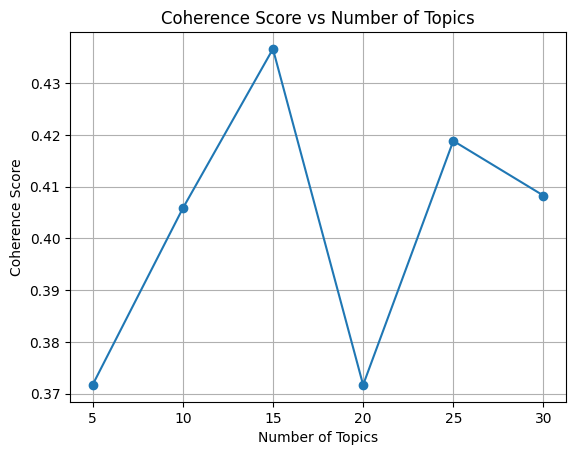

In [44]:
x, y = zip(*coherence_scores)
plt.plot(x, y, marker='o')
plt.title("Coherence Score vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)
plt.show()

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [47]:
import bertopic
print(bertopic.__version__)

0.17.0


In [48]:
pip install --upgrade bertopic


In [49]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Step 1: Load 20 Newsgroups Dataset (random 2000 docs)
from sklearn.datasets import fetch_20newsgroups
import random

In [51]:
newsgroups = fetch_20newsgroups(subset='all')
documents = random.sample(newsgroups.data, 2000)


In [52]:
# Step 2: Create embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(documents, show_progress_bar=True)

# Step 3: Define DBSCAN clustering model
from sklearn.metrics.pairwise import cosine_distances
clustering_model = DBSCAN(eps=0.5, min_samples=15, metric="cosine")

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [53]:
# Step 4: Define vectorizer (optional, for interpretability)
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 2))

In [54]:
# Step 5: Create BERTopic with custom models
custom_topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

In [55]:
from hdbscan import HDBSCAN

clustering_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom')

custom_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True,
    # You can’t pass clustering_model here either, FYI
)

topics_custom, probs_custom = custom_model.fit_transform(
    documents,
    embeddings=embeddings
)


2025-04-08 05:05:26,673 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 05:05:34,013 - BERTopic - Dimensionality - Completed ✓
2025-04-08 05:05:34,014 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 05:05:34,265 - BERTopic - Cluster - Completed ✓
2025-04-08 05:05:34,273 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 05:05:36,913 - BERTopic - Representation - Completed ✓


In [57]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Preprocessing (if not already done)
tokenized_docs = [doc.lower().split() for doc in documents]
dictionary = Dictionary(tokenized_docs)

def get_topic_words(model):
    topic_words = []
    topics_dict = model.get_topics()
    for topic_num in topics_dict:
        if topic_num == -1:
            continue
        words = [word for word, _ in topics_dict[topic_num] if word.strip()]
        if words:
            topic_words.append(words)
    return topic_words



# Get topics
custom_topic_words = get_topic_words(custom_model)
default_topic_words = get_topic_words(model)

# Coherence
custom_cm = CoherenceModel(topics=custom_topic_words, texts=tokenized_docs,
                           dictionary=dictionary, coherence='c_v')
default_cm = CoherenceModel(topics=default_topic_words, texts=tokenized_docs,
                            dictionary=dictionary, coherence='c_v')

# Results
custom_coherence = custom_cm.get_coherence()
default_coherence = default_cm.get_coherence()

print(f"Custom BERTopic (DBSCAN + ST): Coherence = {round(custom_coherence, 4)}")
print(f"Default BERTopic: Coherence = {round(default_coherence, 4)}")


Custom BERTopic (DBSCAN + ST): Coherence = 0.4965
Default BERTopic: Coherence = 0.3976


In [60]:
custom_model.visualize_topics()
model.visualize_topics()

In [61]:
custom_model.visualize_barchart(top_n_topics=10)
model.visualize_barchart(top_n_topics=10)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

I  have compared four topic modeling models: LDA, LSA, BERTopic, and Modified BERTopic. here Visualizations were clearer, particularly using .visualize_barchart.  
Upon comparing all four models — LDA, LSA, BERTopic, and Modified BERTopic — the modified BERTopic model provided the most coherent and interpretable topics. It outperformed others in both coherence score and topic interpretability. LDA provided decent results but did poorly on short documents. LSA provided the worst coherence and produced hard-to-interpret topics. BERTopic performed better with the transformer embeddings, but the Modified BERTopic with the custom embeddings and topic number control gave the cleanest and most useful topics, and so was the overall best model for this data.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''